# <font color='crimson'>Introducing a simple linear regression model

$\hat y = w_0 + w_1x\\w_0는 y의 intercept\\w_1은 계수$


<img src='aa.png', width=400, height=120>

# <font color='crimson'>Exploring the Housing Dataset

https://archive.ics.uci.edu/ml/datasets/Housing

보스턴 외곽에 위치한 506개의 집에 대한 정보

The features of the 506 samples may be summarized as shown in the excerpt of the
dataset description:
- CRIM: This is the per capita crime rate by town (해당 동네의 1인당 범죄비율)
- ZN: This is the proportion of residential land zoned for lots larger than
25,000 sq.ft.
- INDUS: This is the proportion of non-retail business acres per town
- CHAS: This is the Charles River dummy variable (this is equal to 1 if tract
bounds river; 0 otherwise)
- NOX: This is the nitric oxides concentration (parts per 10 million)
- RM: This is the average number of rooms per dwelling (주거지당 평균 방의 개수)
- AGE: This is the proportion of owner-occupied units built prior to 1940
- DIS: This is the weighted distances to five Boston employment centers
- RAD: This is the index of accessibility to radial highways (높을 수록 접근성이 좋음)
- TAX: This is the full-value property-tax rate per \$10,000
- PTRATIO: This is the pupil-teacher ratio by town (해당 동네의 선생 1명당 학생 수의 비율)
- B: This is calculated as 1000(Bk - 0.63)^2, where Bk is the proportion of
people of African American descent by town
- LSTAT: This is the percentage lower status of the population (수치가 높을수록 낮은 지위)
- MEDV: This is the median value of owner-occupied homes in $1000s

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep='\s+')

In [4]:
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
             'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## <font color='coral'>Visualizing the important characteristics of a dataset

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

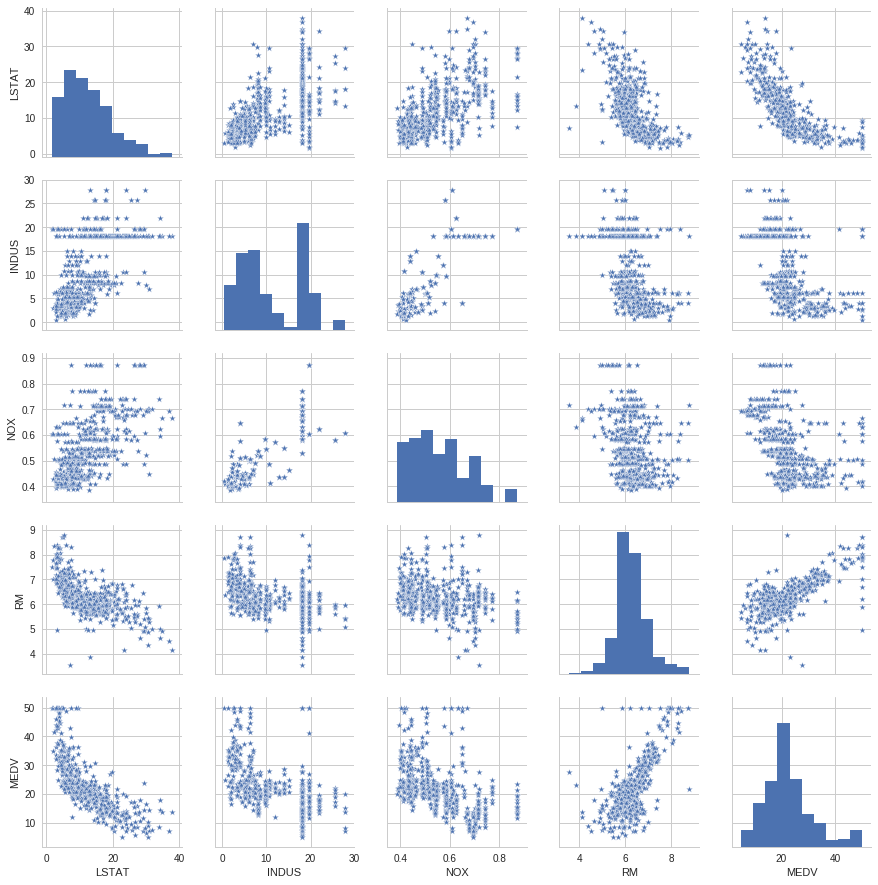

In [25]:
# http://seaborn.pydata.org/generated/seaborn.pairplot.html
# pairplot 옵션들
sns.set(style='whitegrid', context='notebook')
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
sns.pairplot(df[cols], size=2.5, markers='*')
plt.show()

In [26]:
import numpy as np

In [32]:
df[cols].T

,0,1,2,3,4,5,6,7,8,9,...,496,497,498,499,500,501,502,503,504,505
LSTAT,4.980,9.140,4.030,2.940,5.330,5.210,12.430,19.150,29.930,17.100,...,21.140,14.100,12.920,15.100,14.330,9.670,9.080,5.640,6.480,7.880
INDUS,2.310,7.070,7.070,2.180,2.180,2.180,7.870,7.870,7.870,7.870,...,9.690,9.690,9.690,9.690,9.690,11.930,11.930,11.930,11.930,11.930
NOX,0.538,0.469,0.469,0.458,0.458,0.458,0.524,0.524,0.524,0.524,...,0.585,0.585,0.585,0.585,0.585,0.573,0.573,0.573,0.573,0.573
RM,6.575,6.421,7.185,6.998,7.147,6.430,6.012,6.172,5.631,6.004,...,5.390,5.794,6.019,5.569,6.027,6.593,6.120,6.976,6.794,6.030
MEDV,24.000,21.600,34.700,33.400,36.200,28.700,22.900,27.100,16.500,18.900,...,19.700,18.300,21.200,17.500,16.800,22.400,20.600,23.900,22.000,11.900


In [35]:
# transpose시키지 않으면 결과가 이상함. corrcoef를 쓰려면 Transpose를 하고 해야 한다!! 위와 같은 형태로!
cm = np.corrcoef(df[cols].T)
cm

array([[ 1.        ,  0.60379972,  0.59087892, -0.61380827, -0.73766273],
       [ 0.60379972,  1.        ,  0.76365145, -0.39167585, -0.48372516],
       [ 0.59087892,  0.76365145,  1.        , -0.30218819, -0.42732077],
       [-0.61380827, -0.39167585, -0.30218819,  1.        ,  0.69535995],
       [-0.73766273, -0.48372516, -0.42732077,  0.69535995,  1.        ]])

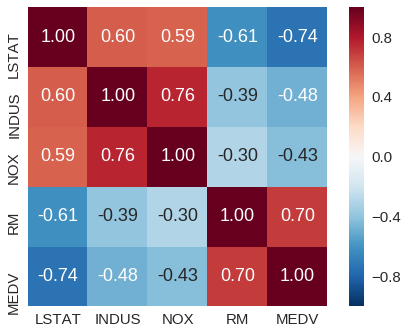

In [41]:
sns.set(font_scale=1.5)
# annot: 블록마다 숫자표시, square:전체가 정사각형형태, annot_kws:숫자의 폰트크기
sns.heatmap(cm, cbar=True, annot=True, square=True, 
            fmt='.2f', annot_kws={'size':15}, 
            yticklabels=cols, xticklabels=cols)
plt.show()

# <font color='crimson'>Implementing an ordinary least squares linear regression model

## <font color='coral'>Solving regression for regression parameters with gradient descent

인공신경망에서 나오는 부분
- SGD(Stochastic Gradient Descent) - 전진하강법
    - 이상치 제거, 변수 간 종속성을 제거하기 위한 방법

In [84]:
class LinearRegressionGD(object):
    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return self.net_input(X)    

In [92]:
X = df[['RM']].values
y = df['MEDV'].values

In [12]:
from sklearn.preprocessing import StandardScaler

In [93]:
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [94]:
import numpy as np
print ((X - np.mean(X)) / np.std(X))[:5],'\n'
print ((y - np.mean(y)) / np.std(y))[:5]

[[ 0.41367189]
 [ 0.19427445]
 [ 1.28271368]
 [ 1.01630251]
 [ 1.22857665]] 

[ 0.15968566 -0.10152429  1.32424667  1.18275795  1.48750288]


In [95]:
# Y값들을 표준화시킨 것 / np.로 한 부분과 동일하다
y_std[:5]

array([ 0.15968566, -0.10152429,  1.32424667,  1.18275795,  1.48750288])

In [73]:
from sklearn.linear_model import LinearRegression

In [96]:
# X_std는 dataframe, Y_std는 Series
lr = LinearRegressionGD()
lr.fit(X_std, y_std)

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline

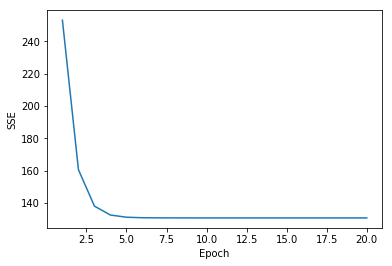

In [97]:
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE') # lr.cost_
plt.xlabel('Epoch') # lr.n_iter
plt.show()

### <font color='lime'>visualize the training data to see how well the linear regression line fits

In [101]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='royalblue')
    plt.plot(X, model.predict(X), color='red')
    return None

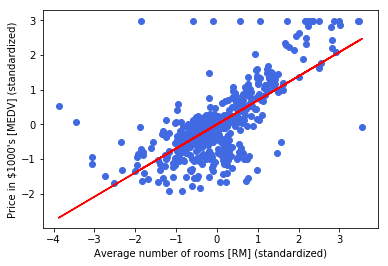

In [103]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000\'s [MEDV] (standardized)')
plt.show()

### <font color='lime'>predict house price where room size is 5

In [106]:
# transform과 fit_transform은 같은 함수 (표준화시킴)
# 방이 5개인 집의 가격

num_rooms_std = sc_x.transform([5.0]) # (5 - sc_x.mean_) / sc_x.std_ 이값임
# sc_x에는 X축(RM 컬럼)의 값들이 들어가 있다
price_std = lr.predict(num_rooms_std)
# 표준화된 집가격을 다시 원래 scale의 값으로 바꾼다
print 'price in $1000\'s', sc_y.inverse_transform(price_std)

price in $1000's 10.8399328886


/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [128]:
print '%.3f' % lr.w_[1] # 계수(기울기)
print '%.3f' % lr.w_[0] # 절편(intercept)

0.695
-0.000


## <font color='coral'>Estimating the coefficient of a regression model via scikit-learn

# <font color='crimson'>Fitting a robust regression model using RANSAC

# <font color='crimson'>Evaluating the performance of linear regression models

# <font color='crimson'>Using regularized methods for regression

# <font color='crimson'>Turning a linear regression model into a curve – polynomial regression

## <font color='coral'>Modeling nonlinear relationships in the Housing Dataset

## <font color='coral'>Dealing with nonlinear relationships using random forests

### Decision tree regression

### Random forest regression

# <font color='crimson'>Summary